In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
# !pip install yfinance

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import yfinance as yf
import csv

# Define the stock ticker and the date range
ticker = 'BBCA.JK'
start_date = '2010-01-04'
end_date = '2019-12-01'

train_start_date = '2010-01-04'
train_end_date = '2019-12-01'

test_start_date = '2020-01-02'
test_end_date = '2022-12-01'

validation_start_date = '2023-01-02'
validation_end_date = datetime.date.today()


# Get the data
train_data = yf.download(ticker, start=train_start_date, end=train_end_date)

train_data.to_csv('train_data.csv')


# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
#train_data = web.DataReader('AAPL', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
#test_data = web.DataReader('AAPL', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = yf.download(ticker, start=test_start_date, end=test_end_date)

validation_data = yf.download(ticker, start=validation_start_date, end=validation_end_date)
#test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1)) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359924,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284058,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.510986,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473206,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662292,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.060059,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


In [5]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.104980,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024414,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944824,53692500
...,...,...,...,...,...,...
2022-11-24,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
2022-11-25,9000.0,9000.0,8900.0,8975.0,8526.791992,75048300
2022-11-28,9050.0,9100.0,8975.0,9025.0,8574.294922,96209700


In [6]:
validation_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,8575.0,8600.0,8500.0,8550.0,8154.729004,10653900
2023-01-03,8550.0,8600.0,8525.0,8550.0,8154.729004,27399100
2023-01-04,8525.0,8575.0,8350.0,8350.0,7963.975098,90918800
2023-01-05,8350.0,8375.0,8150.0,8250.0,7868.597656,128838500
2023-01-06,8100.0,8325.0,8100.0,8300.0,7916.286621,69286600
...,...,...,...,...,...,...
2024-11-11,9800.0,10050.0,9800.0,10050.0,10050.000000,128707600
2024-11-12,10100.0,10225.0,10000.0,10150.0,10150.000000,80378500
2024-11-13,10225.0,10250.0,10150.0,10150.0,10150.000000,62933100


In [7]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [8]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1010.0,1010.0,965.0,1010.0,800.359924,77812500
2010-01-05,1020.0,1020.0,990.0,1020.0,808.284058,44442500
2010-01-06,990.0,1020.0,990.0,990.0,784.510986,27782500
2010-01-07,995.0,995.0,965.0,995.0,788.473206,38632500
2010-01-08,970.0,995.0,970.0,970.0,768.662292,27427500
...,...,...,...,...,...,...
2019-11-25,6330.0,6335.0,6275.0,6275.0,5638.060059,55133500
2019-11-26,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2019-11-27,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500


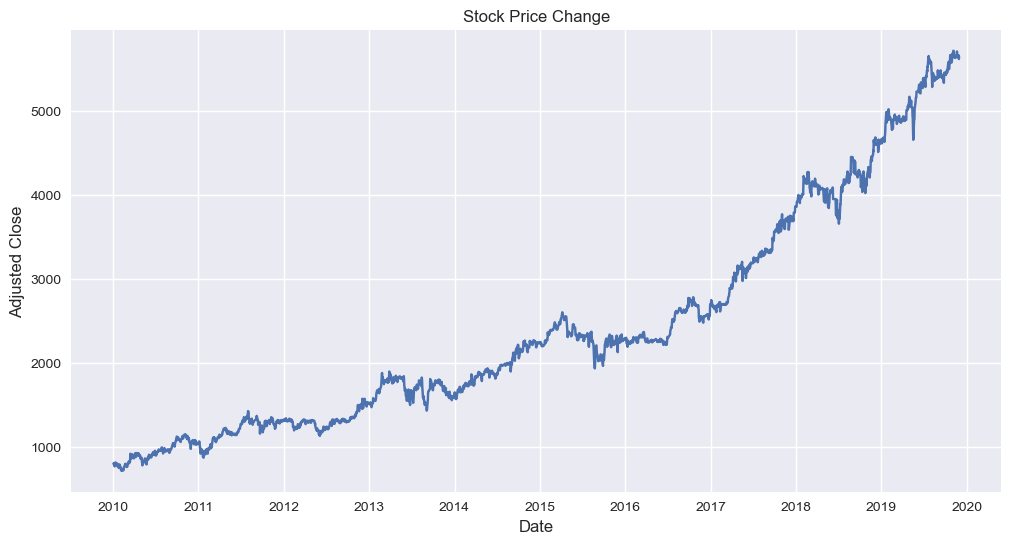

In [9]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

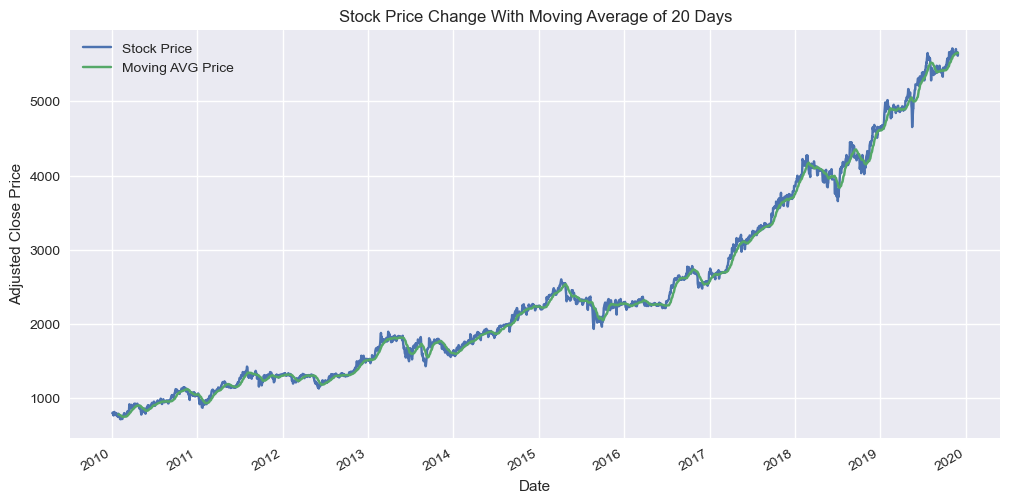

In [10]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_20 = close_price.rolling(window=20).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 20 Days")
close_price.plot(label='Stock Price')
moving_avg_20.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

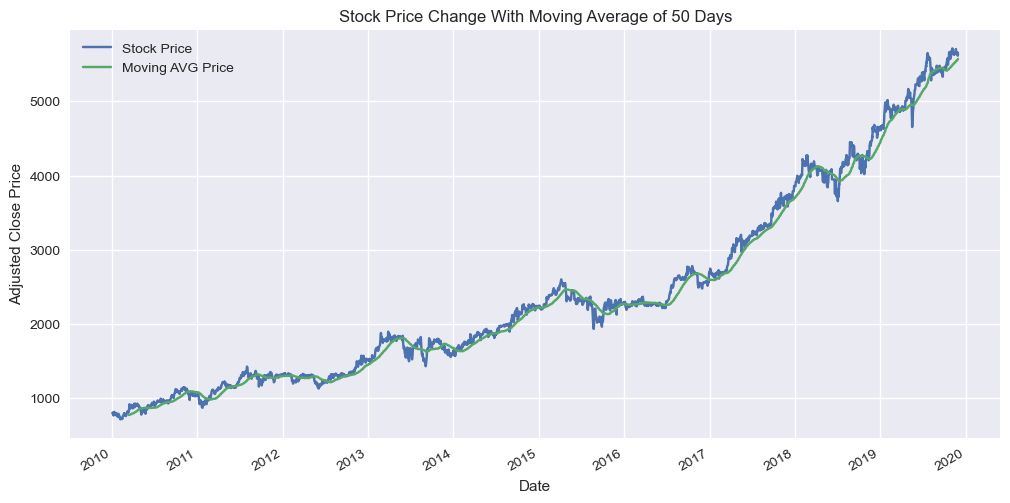

In [11]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_50 = close_price.rolling(window=50).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 50 Days")
close_price.plot(label='Stock Price')
moving_avg_50.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

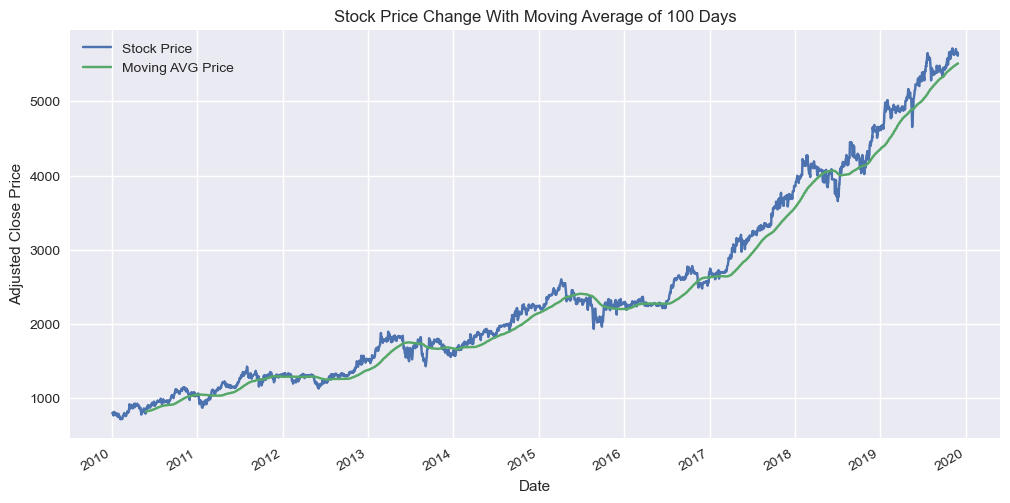

In [12]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_100 = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg_100.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

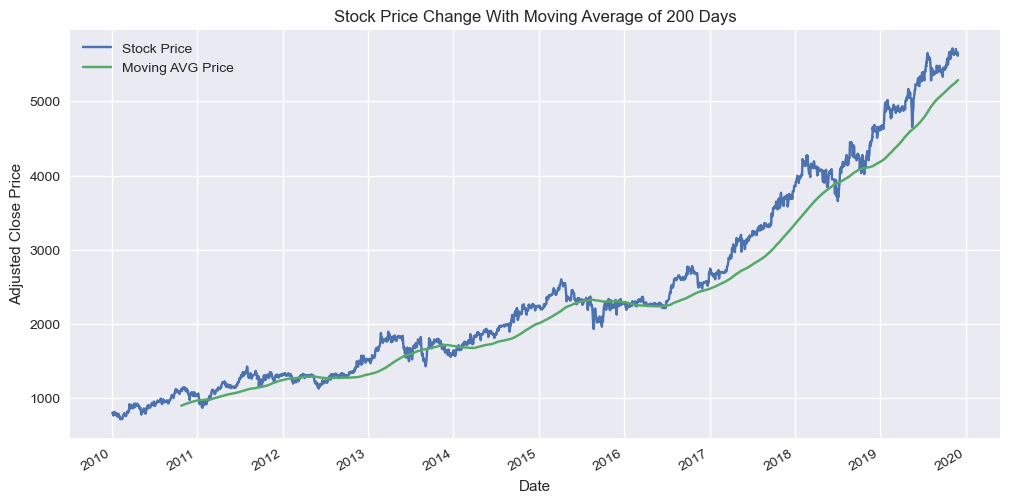

In [13]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg_200 = close_price.rolling(window=200).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 200 Days")
close_price.plot(label='Stock Price')
moving_avg_200.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

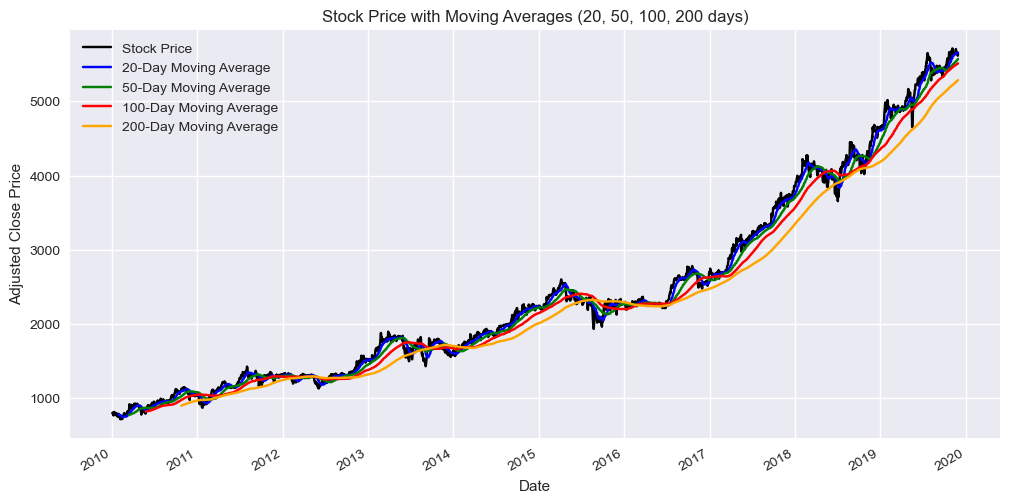

In [14]:
close_price = train_data['Adj Close']

# Calculate moving averages
moving_avg_20 = close_price.rolling(window=20).mean()
moving_avg_50 = close_price.rolling(window=50).mean()
moving_avg_100 = close_price.rolling(window=100).mean()
moving_avg_200 = close_price.rolling(window=200).mean()

# Plotting the stock price and the moving averages
plt.figure(figsize=(12, 6))
plt.title("Stock Price with Moving Averages (20, 50, 100, 200 days)")
close_price.plot(label='Stock Price', color='black')
moving_avg_20.plot(label='20-Day Moving Average', color='blue')
moving_avg_50.plot(label='50-Day Moving Average', color='green')
moving_avg_100.plot(label='100-Day Moving Average', color='red')
moving_avg_200.plot(label='200-Day Moving Average', color='orange')

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

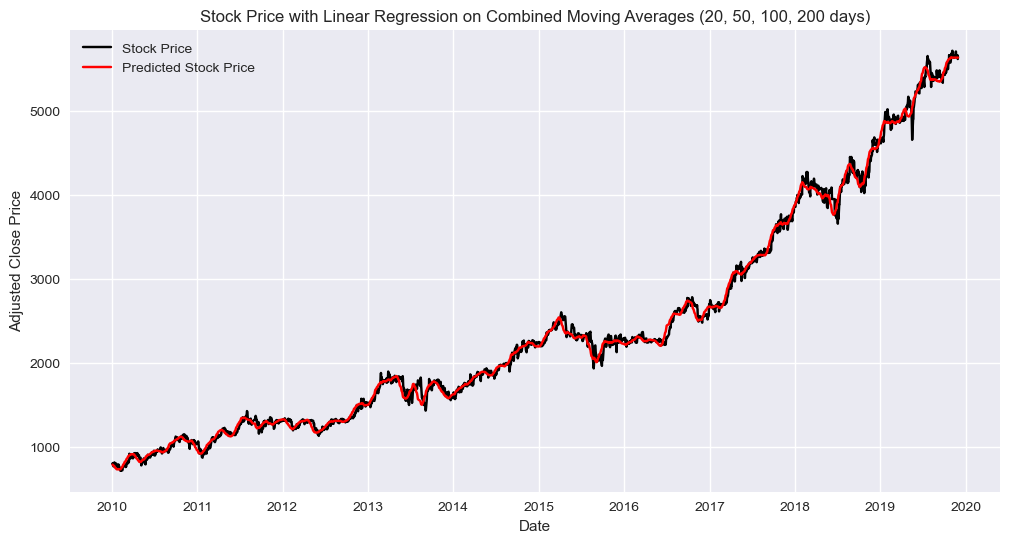

Linear Regression Coefficients:
20-Day Moving Avg Coefficient: 1.3005558586028805
50-Day Moving Avg Coefficient: -0.466759235193507
100-Day Moving Avg Coefficient: 0.18231466991791653
200-Day Moving Avg Coefficient: -0.024240136298020187


In [15]:
close_price = train_data['Adj Close']

# Calculate the moving averages with the proper handling of NaN values
moving_avg_20 = close_price.rolling(window=20).mean()
moving_avg_50 = close_price.rolling(window=50).mean()
moving_avg_100 = close_price.rolling(window=100).mean()
moving_avg_200 = close_price.rolling(window=200).mean()

# Optionally, you could shift the moving averages if you want to retain more of the initial data
# For example, shift them forward so the first data point aligns with the moving average calculation
moving_avg_20 = moving_avg_20.shift(-19)  # Shift so that the first 19 values are filled by later data
moving_avg_50 = moving_avg_50.shift(-49)
moving_avg_100 = moving_avg_100.shift(-99)
moving_avg_200 = moving_avg_200.shift(-199)

# Concatenate and forward fill the NaNs (if necessary)
aligned_data = pd.concat([close_price, moving_avg_20, moving_avg_50, moving_avg_100, moving_avg_200], axis=1)

# You can fill the NaNs with linear interpolation instead of mean filling
aligned_data.interpolate(method='linear', axis=0, inplace=True)

# Rename columns for clarity
aligned_data.columns = ['Adj Close', '20', '50', '100', '200']

# Redefine variables after alignment (now no NaNs exist in aligned_data)
close_price = aligned_data['Adj Close']
moving_avg_20 = aligned_data['20']
moving_avg_50 = aligned_data['50']
moving_avg_100 = aligned_data['100']
moving_avg_200 = aligned_data['200']

# Initialize the linear regression model
model = LinearRegression()

# Combine the moving averages into one DataFrame (independent variables)
X = aligned_data[['20', '50', '100', '200']]  # Features (moving averages)
y = close_price  # Target (stock price)

# Fit the model
model.fit(X, y)

# Predict the stock price based on the moving averages
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Stock Price with Linear Regression on Combined Moving Averages (20, 50, 100, 200 days)")

# Plot the original stock price
plt.plot(close_price.index, close_price, label='Stock Price', color='black')

# Plot the predicted stock price
plt.plot(close_price.index, y_pred, label='Predicted Stock Price', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients for each moving average
print("Linear Regression Coefficients:")
print(f"20-Day Moving Avg Coefficient: {model.coef_[0]}")
print(f"50-Day Moving Avg Coefficient: {model.coef_[1]}")
print(f"100-Day Moving Avg Coefficient: {model.coef_[2]}")
print(f"200-Day Moving Avg Coefficient: {model.coef_[3]}")


In [16]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,14613.0,1010.0,1010.0,965.0,1010.0,800.359924,77812500
1,14614.0,1020.0,1020.0,990.0,1020.0,808.284058,44442500
2,14615.0,990.0,1020.0,990.0,990.0,784.510986,27782500
3,14616.0,995.0,995.0,965.0,995.0,788.473206,38632500
4,14617.0,970.0,995.0,970.0,970.0,768.662292,27427500
...,...,...,...,...,...,...,...
2466,18225.0,6330.0,6335.0,6275.0,6275.0,5638.060059,55133500
2467,18226.0,6330.0,6330.0,6270.0,6285.0,5647.044922,192783500
2468,18227.0,6270.0,6300.0,6240.0,6300.0,5660.522949,58833500
2469,18228.0,6295.0,6295.0,6245.0,6250.0,5615.597656,44248000


In [17]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = y_pred  # CHANGES from the original code Use the predicted values from linear regression instead of actual prices

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1)).ravel()

In [18]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

In [19]:
SVR_linear_train

array([ 478.97240611,  479.98728746,  481.00216883, ..., 4146.75366032,
       4147.76854169, 4148.78342304])

In [20]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'C': [1e3, 1e4, 1e5, 1e6], 
#     'gamma': [0.01, 0.1, 1, 10]
# }

# # Use GridSearchCV to find the optimal parameters
# grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, verbose=3)
# grid_search.fit(dates_data, prices_data)

# # Best parameters
# print("Best parameters:", grid_search.best_params_)


In [21]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1) 
# Large gamma: overfitting, Small gamma: underfitting
# Smaller C will make the algorithm faster, but may decrease the model's performance
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

In [22]:
SVR_rbfk_train

array([ 790.10979945,  786.84329856,  788.19845439, ..., 5632.04969686,
       5653.92680638, 5632.0497288 ])

In [23]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

In [24]:
SVR_poly_train

array([ 745.80259799,  746.90867039,  748.01362403, ..., 5797.95967491,
       5801.96510478, 5805.97325898])

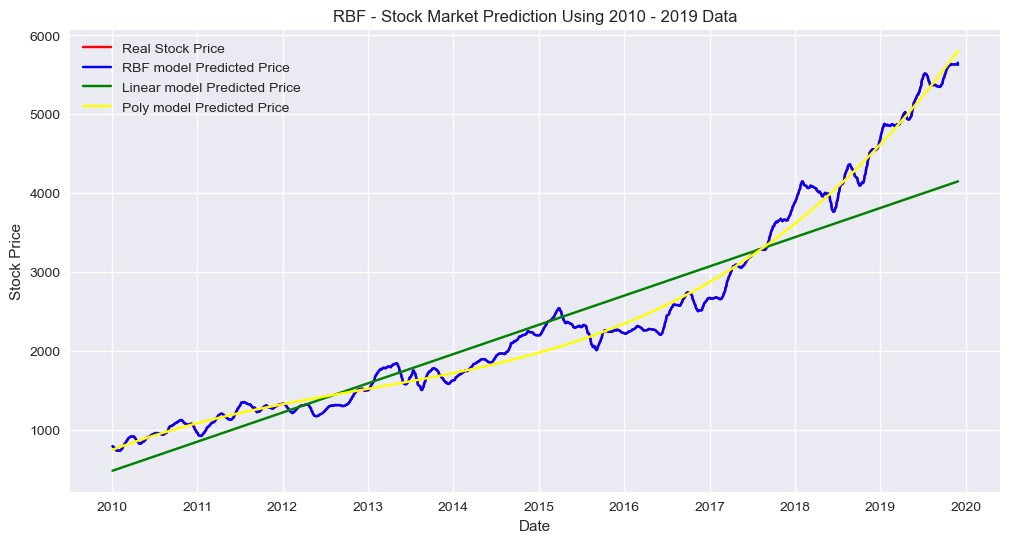

In [25]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2010 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [27]:
test_indxed_dates

,Date,Open,High,Low,Close,Adj Close,Volume
0,18263.0,6695.0,6780.0,6680.0,6690.0,6029.958496,49445000
1,18264.0,6750.0,6800.0,6725.0,6800.0,6129.104980,47755500
2,18267.0,6720.0,6750.0,6690.0,6735.0,6070.518555,27300000
3,18268.0,6735.0,6770.0,6730.0,6740.0,6075.024414,45022500
4,18269.0,6670.0,6745.0,6670.0,6680.0,6020.944824,53692500
...,...,...,...,...,...,...,...
708,19320.0,8975.0,9000.0,8950.0,9000.0,8550.542969,53520800
709,19321.0,9000.0,9000.0,8900.0,8975.0,8526.791992,75048300
710,19324.0,9050.0,9100.0,8975.0,9025.0,8574.294922,96209700
711,19325.0,8975.0,9075.0,8925.0,8975.0,8526.791992,91562100


In [28]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [29]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6030.05877617, 6129.00502948, 6070.61813024, 6058.59946611,
       6064.92662732, 6074.92506895, 6061.6050672 , 6079.63145388,
       6143.79842449, 6166.94261776, 6174.07321106, 6196.80579902,
       6160.55245229, 6156.04564962, 6165.25848941, 6151.27390405,
       6138.21842303, 6165.05923315, 6123.66143711, 6115.6849998 ,
       6042.79692404, 5840.77649552, 5804.52256867, 5971.23971817,
       6055.1853163 , 6075.1240798 , 6092.95166015, 6115.48462015,
       6110.97781116, 6129.20495609, 6103.51404601, 6021.04430003,
       6056.89845816, 6034.56428088, 5987.54497782, 5974.00399081,
       5962.25707069, 5881.33674189, 5869.9142385 , 5786.69725074,
       5706.99354491, 5669.32204732, 5480.24184093, 5638.96166911,
       5804.72223552, 5800.21699599, 5588.20126681, 5214.34562751,
       5340.33321179, 5272.73397301, 5071.89965749, 5011.34591064,
       5011.34586083, 4614.95457968, 4288.16359466, 4195.53773264,
       4267.74019341, 3993.03150843, 4056.12642056, 4758.96992

In [30]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5754.63449371, 5755.88256634, 5759.62678426, 5760.87485689,
       5762.12292953, 5763.37100217, 5764.61907481, 5768.36329272,
       5769.61136536, 5770.85943799, 5772.10751063, 5773.35558327,
       5777.09980118, 5778.34787382, 5779.59594646, 5780.84401909,
       5782.09209173, 5785.83630964, 5787.08438228, 5788.33245492,
       5789.58052756, 5790.82860019, 5794.57281811, 5795.82089074,
       5797.06896338, 5798.31703602, 5799.56510866, 5803.30932657,
       5804.55739921, 5805.80547185, 5807.05354448, 5808.30161712,
       5812.04583503, 5813.29390767, 5814.54198031, 5815.79005295,
       5817.03812558, 5820.7823435 , 5822.03041613, 5823.27848877,
       5824.52656141, 5825.77463405, 5829.51885196, 5830.7669246 ,
       5832.01499723, 5833.26306987, 5834.51114251, 5838.25536042,
       5839.50343306, 5840.7515057 , 5841.99957833, 5843.24765097,
       5846.99186888, 5848.23994152, 5849.48801416, 5850.7360868 ,
       5851.98415943, 5855.72837735, 5856.97644998, 5859.47259

In [31]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

/Users/minseokim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6139.64552326, 6129.13116927, 6098.08149858, 6087.8950567 ,
       6077.7898326 , 6067.76552325, 6057.82182613, 6028.47139095,
       6018.84712818, 6009.301973  , 5999.83562607, 5990.44778856,
       5962.75235229, 5953.67557485, 5944.67582066, 5935.75279408,
       5926.90619997, 5900.82206924, 5892.27826439, 5883.80942433,
       5875.4152571 , 5867.09547128, 5842.57949589, 5834.55433197,
       5826.60210024, 5818.72251244, 5810.91528084, 5787.9248538 ,
       5780.40418022, 5772.9544321 , 5765.57532486, 5758.26657448,
       5736.75963202, 5729.72947925, 5722.76827107, 5715.87572661,
       5709.05156552, 5688.98658706, 5682.43316663, 5675.9467358 ,
       5669.52701738, 5663.17373474, 5644.50974288, 5638.41944741,
       5632.3942124 , 5626.43376437, 5620.53783037, 5603.23439095,
       5597.59379411, 5592.01635446, 5586.50180222, 5581.04986814,
       5565.06709017, 5559.86294671, 5554.72008303, 5549.63823306,
       5544.61713124, 5529.91566695, 5525.13491266, 5515.75142

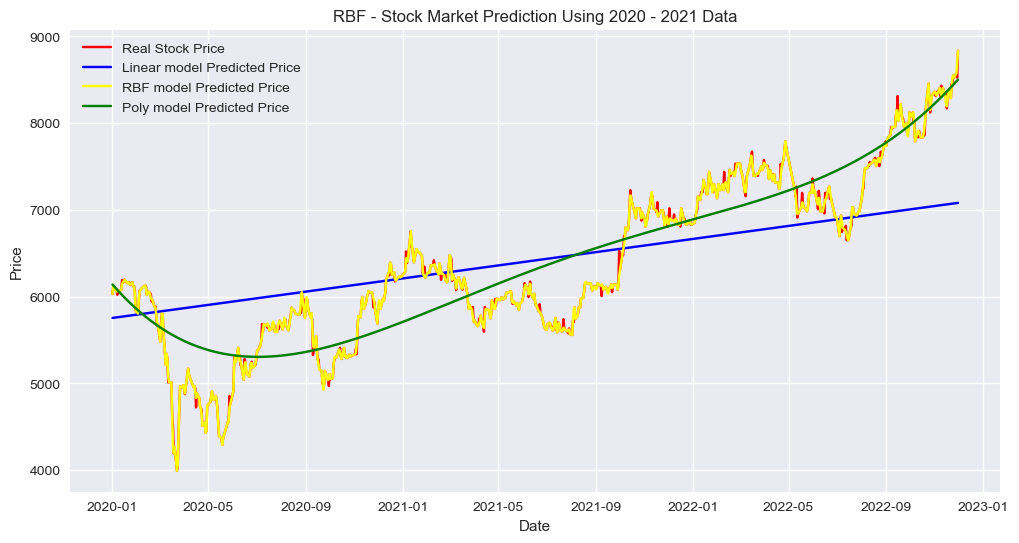

In [32]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))


SVR RBF Train RMSE: 0.59
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 0.17
SVR RBF Test RMSE: 38.71
SVR RBF Test R2 Score: 1.00
SVR RBF Test MAE Score: 15.34


In [34]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 488.38
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 352.37
SVR Linear Test RMSE: 651.45
SVR Linear Test R2 Score: 0.54
SVR Linear Test MAE Score: 538.09


In [35]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 155.35
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 117.75
SVR Poly Test RMSE: 413.84
SVR Poly Test R2 Score: 0.81
SVR Poly Test MAE Score: 337.79
